In [72]:
%matplotlib notebook
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [73]:
import numpy as np
import pandas as pd

In [74]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [75]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [76]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [77]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [78]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [79]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [80]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [99]:
columns = inspector.get_columns('measurement')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [100]:
columns = inspector.get_columns('station')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [81]:
# Find all of the columns in a database
inspector = inspect(engine)

for table_name in inspector.get_table_names():
   for column in inspector.get_columns(table_name):
       print("Column: %s" % column['name'])

Column: id
Column: station
Column: date
Column: prcp
Column: tobs
Column: id
Column: station
Column: name
Column: latitude
Column: longitude
Column: elevation


In [82]:
engine.execute('SELECT * FROM Measurement LIMIT 5').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0)]

# Exploratory Climate Analysis

In [ ]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Get the last date in the data

# Calculate the date 1 year ago from today

# Perform a query to retrieve the data and precipitation scores

# Save the query results as a Pandas DataFrame and set the index to the date column

# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data

# Rotate the xticks for the dates



In [83]:
# Grabs the last date entry in the data table
last_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print(last_date)

('2017-08-23',)


In [84]:
yr_ago = dt.date(2017,8,23) - dt.timedelta(days=365)
yr_ago

datetime.date(2016, 8, 23)

In [85]:
# prcp_ytd = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date > yr_ago).\
#    order_by(Measurement.date).all()

prcp_ytd = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= '2016-08-24').filter(Measurement.date <= '2017-08-23').\
    order_by(Measurement.date).all()
print(prcp_ytd)

[('2016-08-24', 0.08), ('2016-08-24', 2.15), ('2016-08-24', 2.28), ('2016-08-24', None), ('2016-08-24', 1.22), ('2016-08-24', 2.15), ('2016-08-24', 1.45), ('2016-08-25', 0.08), ('2016-08-25', 0.08), ('2016-08-25', 0.0), ('2016-08-25', 0.0), ('2016-08-25', 0.21), ('2016-08-25', 0.06), ('2016-08-25', 0.11), ('2016-08-26', 0.0), ('2016-08-26', 0.03), ('2016-08-26', 0.02), ('2016-08-26', 0.04), ('2016-08-26', 0.0), ('2016-08-26', 0.01), ('2016-08-27', 0.0), ('2016-08-27', 0.18), ('2016-08-27', 0.02), ('2016-08-27', 0.0), ('2016-08-27', 0.12), ('2016-08-27', None), ('2016-08-28', 0.01), ('2016-08-28', 0.14), ('2016-08-28', 0.14), ('2016-08-28', 0.14), ('2016-08-28', 0.6), ('2016-08-28', 2.07), ('2016-08-29', 0.0), ('2016-08-29', 0.17), ('2016-08-29', 0.04), ('2016-08-29', None), ('2016-08-29', 0.0), ('2016-08-29', 0.35), ('2016-08-29', 0.9), ('2016-08-30', 0.0), ('2016-08-30', 0.0), ('2016-08-30', 0.02), ('2016-08-30', 0.0), ('2016-08-30', 0.0), ('2016-08-30', 0.05), ('2016-08-31', 0.13), (

In [86]:

# Load the data from the query into a dataframe

prcp_ytd_df = pd.DataFrame(prcp_ytd)
prcp_ytd_df.head()

,date,prcp
0,2016-08-24,0.08
1,2016-08-24,2.15
2,2016-08-24,2.28
3,2016-08-24,NaN
4,2016-08-24,1.22


In [87]:
prcp_ytd_df.set_index('date')
prcp_ytd_df.info()
prcp_ytd_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2223 entries, 0 to 2222
Data columns (total 2 columns):
date    2223 non-null object
prcp    2015 non-null float64
dtypes: float64(1), object(1)
memory usage: 34.8+ KB


,date,prcp
0,2016-08-24,0.08
1,2016-08-24,2.15
2,2016-08-24,2.28
3,2016-08-24,NaN
4,2016-08-24,1.22


In [88]:
prcp_ytd_df.head()

,date,prcp
0,2016-08-24,0.08
1,2016-08-24,2.15
2,2016-08-24,2.28
3,2016-08-24,NaN
4,2016-08-24,1.22


<IPython.core.display.Javascript object>


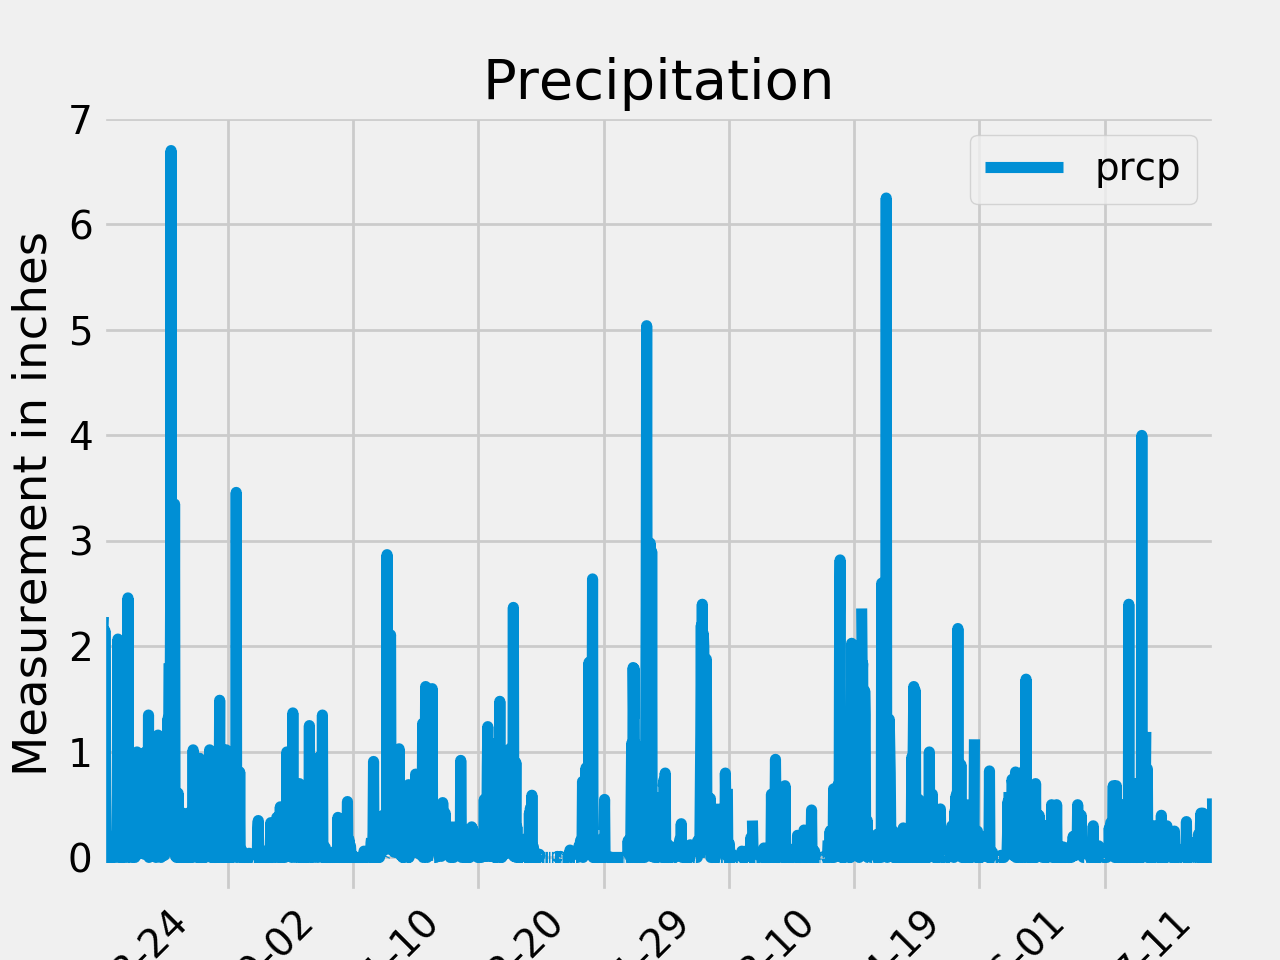

In [144]:
prcp_ytd_df.plot('date', 'prcp')
plt.title("Precipitation")
plt.xlabel("date")
plt.ylabel("Measurement in inches")
plt.xticks(rotation=45)
plt.show()

In [91]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prcp_ytd_df.prcp.describe()

count    2015.000000
mean        0.176462
std         0.460288
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000
Name: prcp, dtype: float64

In [92]:
# How many stations are available in this dataset?
#st_count = engine.execute('SELECT count(distinct name) FROM station'.group_by(Demographics.location).count()
st_count = session.query(Station.name).group_by(Station.id).count()
print("There are {} stations in this dataset.".format(st_count))

There are 9 stations in this dataset.


In [119]:
# What are the most active stations?
# List the stations and the counts in descending order.

engine.execute("SELECT station, Count(station) FROM measurement Group by station Order by count(station) DESC").fetchall()


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [127]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?

mx_stat = engine.execute("SELECT station, Max(tobs) FROM measurement").fetchall()
mn_stat = engine.execute("SELECT station, Min(tobs) FROM measurement").fetchall()
av_stat = engine.execute("SELECT station, AVG(tobs) FROM measurement").fetchall()
#session.query(station.id, func.max(station.prcp))
#mx_stat= session.query(Station.name, func.max(Measurement.prcp))
print(mx_stat)
print(mn_stat)
print(av_stat)




[('USC00519397', 87.0)]
[('USC00511918', 53.0)]
[('USC00516128', 73.09795396419437)]


In [128]:
high_rain = engine.execute("SELECT Max(tobs) FROM measurement").fetchall()
low_rain = engine.execute("SELECT Min(tobs) FROM measurement").fetchall()
avg_rain = engine.execute("SELECT AVG(tobs) FROM measurement").fetchall()
#session.query(station.id, func.max(station.prcp))
#mx_stat= session.query(Station.name, func.max(Measurement.prcp))
print(low_rain, high_rain, avg_rain)

[(53.0,)] [(87.0,)] [(73.09795396419437,)]


In [129]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

tobs_ytd = session.query(Measurement.date, Measurement.tobs).\
    filter(Measurement.date >= '2016-08-24').filter(Measurement.date <= '2017-08-23').\
    order_by(Measurement.date).all()
print(tobs_ytd)

[('2016-08-24', 79.0), ('2016-08-24', 76.0), ('2016-08-24', 80.0), ('2016-08-24', 78.0), ('2016-08-24', 79.0), ('2016-08-24', 77.0), ('2016-08-24', 74.0), ('2016-08-25', 80.0), ('2016-08-25', 77.0), ('2016-08-25', 81.0), ('2016-08-25', 81.0), ('2016-08-25', 80.0), ('2016-08-25', 80.0), ('2016-08-25', 77.0), ('2016-08-26', 79.0), ('2016-08-26', 78.0), ('2016-08-26', 81.0), ('2016-08-26', 81.0), ('2016-08-26', 84.0), ('2016-08-26', 80.0), ('2016-08-27', 77.0), ('2016-08-27', 73.0), ('2016-08-27', 81.0), ('2016-08-27', 81.0), ('2016-08-27', 75.0), ('2016-08-27', 74.0), ('2016-08-28', 78.0), ('2016-08-28', 73.0), ('2016-08-28', 81.0), ('2016-08-28', 80.0), ('2016-08-28', 73.0), ('2016-08-28', 71.0), ('2016-08-29', 78.0), ('2016-08-29', 78.0), ('2016-08-29', 80.0), ('2016-08-29', 80.0), ('2016-08-29', 79.0), ('2016-08-29', 78.0), ('2016-08-29', 78.0), ('2016-08-30', 79.0), ('2016-08-30', 76.0), ('2016-08-30', 79.0), ('2016-08-30', 78.0), ('2016-08-30', 77.0), ('2016-08-30', 75.0), ('2016-08

In [132]:
# Load the data from the query into a dataframe

tobs_ytd_df = pd.DataFrame(tobs_ytd)
tobs_ytd_df.head()

,date,tobs
0,2016-08-24,79.0
1,2016-08-24,76.0
2,2016-08-24,80.0
3,2016-08-24,78.0
4,2016-08-24,79.0


In [133]:
tobs_ytd_df.set_index('date')
tobs_ytd_df.head()

,date,tobs
0,2016-08-24,79.0
1,2016-08-24,76.0
2,2016-08-24,80.0
3,2016-08-24,78.0
4,2016-08-24,79.0


In [134]:
# Create a group based on the values in the 'maker' column
tobs_group = tobs_ytd_df.groupby('tobs')

# Count how many times each maker appears in our group
count_tobs = tobs_group['tobs'].count()

count_tobs

tobs
58.0      1
59.0      3
60.0      6
61.0      4
62.0     13
63.0     15
64.0     23
65.0     28
66.0     31
67.0     54
68.0     56
69.0     92
70.0    110
71.0    121
72.0    125
73.0    117
74.0    173
75.0    171
76.0    209
77.0    211
78.0    198
79.0    158
80.0    153
81.0     88
82.0     42
83.0     12
84.0      6
85.0      1
87.0      2
Name: tobs, dtype: int64

In [143]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

# Create a bar chart based off of the group series from before

count_chart = count_tobs.plot(kind='hist')

# or
# plt.hist(tobs_ytd_df['tobs'],12)

# Set the xlabel and ylabel using class methods
count_chart.set_xlabel("Temperature")
count_chart.set_ylabel("Frequency")

plt.show()
plt.tight_layout()

In [142]:
plt.show()
plt.tight_layout()

In [16]:
# Write a function called `calc_temps` that will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [17]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


62.0 68.36585365853658 74.0


<IPython.core.display.Javascript object>


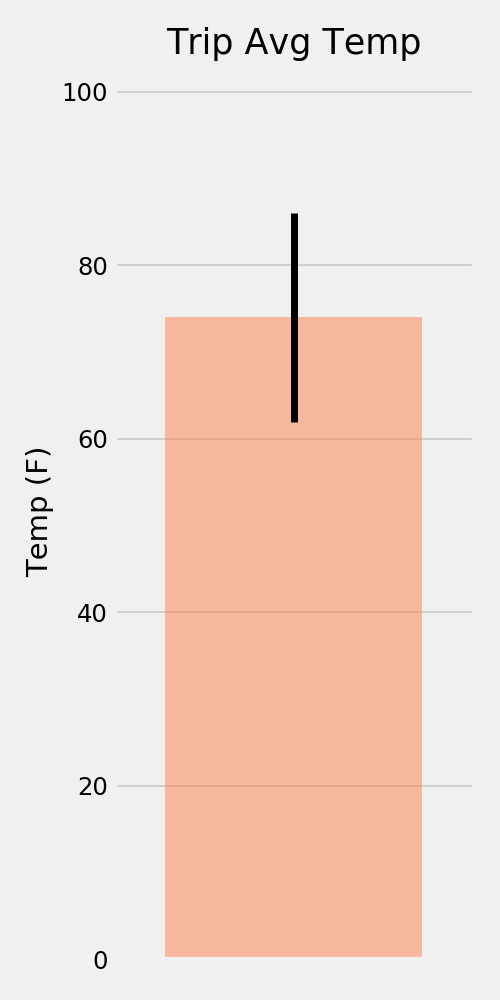

In [18]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [19]:
# Calculate the rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



[('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4, 0.31), ('USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9, 0.25), ('USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6, 0.1), ('USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6, 0.060000000000000005), ('USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9, 0.0), ('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0, 0.0), ('USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9, 0.0), ('USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0, 0.0), ('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5, 0.0)]


## Optional Challenge Assignment

In [20]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [21]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


[(62.0, 69.15384615384616, 77.0),
 (60.0, 69.39622641509433, 77.0),
 (62.0, 68.9090909090909, 77.0),
 (58.0, 70.0, 76.0),
 (56.0, 67.96428571428571, 76.0),
 (61.0, 68.96491228070175, 76.0),
 (57.0, 68.54385964912281, 76.0)]

In [22]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


,tmin,tavg,tmax
date,,,
2018-01-01,62.0,69.153846,77.0
2018-01-02,60.0,69.396226,77.0
2018-01-03,62.0,68.909091,77.0
2018-01-04,58.0,70.000000,76.0
2018-01-05,56.0,67.964286,76.0


<IPython.core.display.Javascript object>


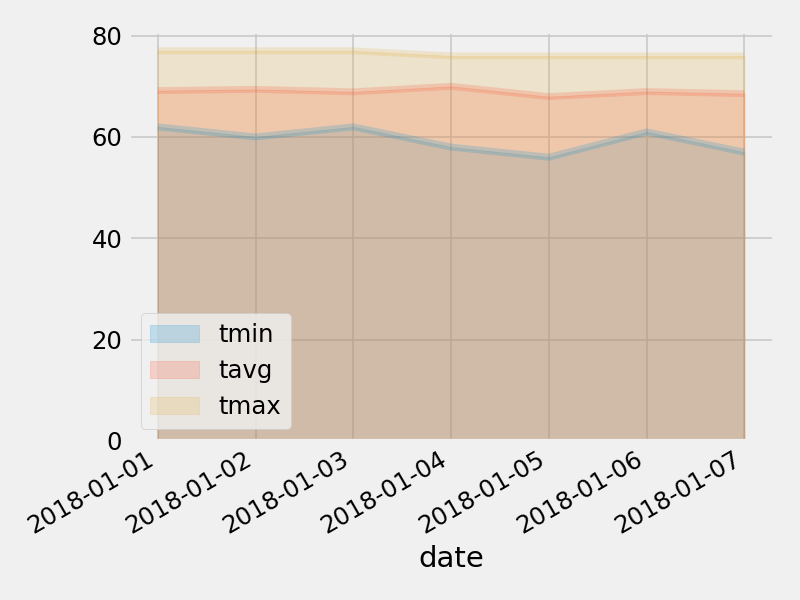

In [23]:
# Plot the daily normals as an area plot with `stacked=False`
